In [536]:
import os
import numpy as np
import pandas as pd
import more_itertools as mit
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler

In [537]:
##https://climate.weather.gc.ca/climate_data/hourly_data_e.html?hlyRange=2013-06-11%7C2021-09-19&dlyRange=2013-06-13%7C2021-09-19&mlyRange=%7C&StationID=51459&Prov=ON&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=2019&EndYear=2020&selRowPerPage=25&Line=4&searchMethod=contains&txtStationName=toronto&timeframe=1&time=LST&time=UTC&Year=2019&Month=1&Day=31#

In [538]:
import os
import pandas as pd
cwd = os.path.abspath('/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/Weather Data') 
files = os.listdir(cwd) 

In [539]:
files

['en_climate_hourly_ON_6158731_02-2019_P1H.csv',
 'en_climate_hourly_ON_6158731_05-2019_P1H.csv',
 'en_climate_hourly_ON_6158731_10-2019_P1H.csv',
 'en_climate_hourly_ON_6158731_11-2019_P1H.csv',
 '.DS_Store',
 'en_climate_hourly_ON_6158731_04-2019_P1H.csv',
 'en_climate_hourly_ON_6158731_03-2019_P1H.csv',
 'en_climate_hourly_ON_6158731_09-2019_P1H.csv',
 'en_climate_hourly_ON_6158731_08-2019_P1H.csv',
 'en_climate_hourly_ON_6158731_01-2019_P1H.csv',
 'en_climate_hourly_ON_6158731_06-2019_P1H.csv',
 'en_climate_hourly_ON_6158731_07-2019_P1H.csv',
 'en_climate_hourly_ON_6158731_12-2019_P1H.csv']

In [540]:
##importing the weather data

In [541]:
import pandas as pd
import glob
path = r'/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/Weather Data' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [542]:
df=frame

In [543]:
df

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 00:00,2019,2,1,00:00,-18.6,...,NaN,24.1,NaN,100.52,NaN,NaN,NaN,-30.0,NaN,Blowing Snow
1,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 01:00,2019,2,1,01:00,-18.8,...,NaN,24.1,NaN,100.55,NaN,NaN,NaN,-30.0,NaN,Blowing Snow
2,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 02:00,2019,2,1,02:00,-18.8,...,NaN,24.1,NaN,100.54,NaN,NaN,NaN,-30.0,NaN,Blowing Snow
3,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 03:00,2019,2,1,03:00,-18.8,...,NaN,24.1,NaN,100.58,NaN,NaN,NaN,-30.0,NaN,NaN
4,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 04:00,2019,2,1,04:00,-18.8,...,NaN,24.1,NaN,100.57,NaN,NaN,NaN,-30.0,NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 19:00,2019,12,31,19:00,-0.8,...,NaN,24.1,NaN,97.96,NaN,NaN,NaN,-7.0,NaN,Mostly Cloudy
8756,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 20:00,2019,12,31,20:00,-1.0,...,NaN,24.1,NaN,98.00,NaN,NaN,NaN,-7.0,NaN,NaN
8757,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 21:00,2019,12,31,21:00,-1.1,...,NaN,24.1,NaN,98.01,NaN,NaN,NaN,-7.0,NaN,NaN
8758,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 22:00,2019,12,31,22:00,-1.5,...,NaN,24.1,NaN,98.05,NaN,NaN,NaN,-7.0,NaN,Clear


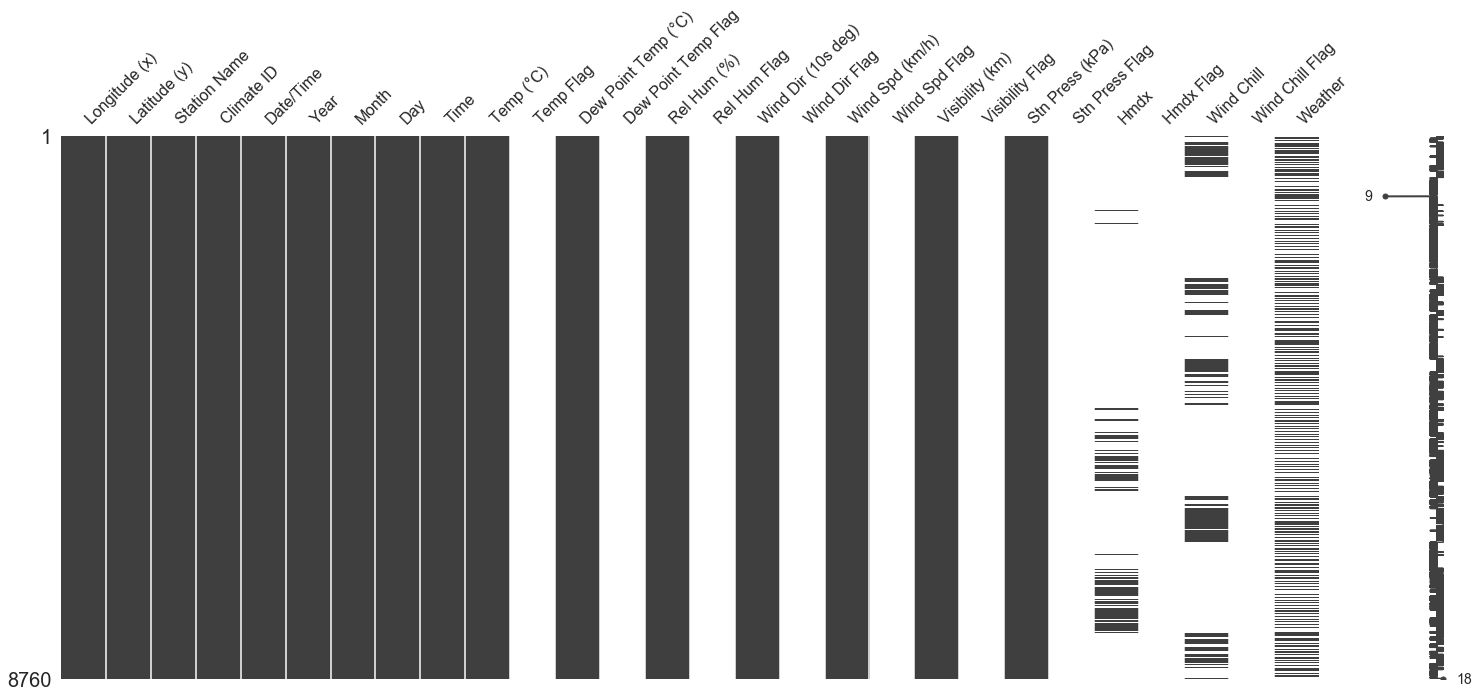

In [544]:
#Lets Visualize the null values in the dataset
msno.matrix(df)
#msno.bar(house_data)

In [545]:
##Feature Engineering

In [546]:
df.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Temp Flag',
       'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)',
       'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag',
       'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)',
       'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather'],
      dtype='object')

In [547]:
df = df.drop(labels = ['Temp Flag', 'Dew Point Temp Flag',
                                       'Rel Hum Flag', 'Wind Dir Flag', 
                                       'Wind Spd Flag', 'Visibility Flag', 
                                       'Stn Press Flag', 'Hmdx Flag', 
                                       'Wind Chill Flag'], 
                             axis = 1)

In [548]:
df = df.fillna(method='ffill')

In [549]:
df.isnull().sum()

Longitude (x)             0
Latitude (y)              0
Station Name              0
Climate ID                0
Date/Time                 0
Year                      0
Month                     0
Day                       0
Time                      0
Temp (°C)                 0
Dew Point Temp (°C)       0
Rel Hum (%)               0
Wind Dir (10s deg)        0
Wind Spd (km/h)           0
Visibility (km)           0
Stn Press (kPa)           0
Hmdx                   1120
Wind Chill                0
Weather                   0
dtype: int64

In [550]:
df.count()

Longitude (x)          8760
Latitude (y)           8760
Station Name           8760
Climate ID             8760
Date/Time              8760
Year                   8760
Month                  8760
Day                    8760
Time                   8760
Temp (°C)              8760
Dew Point Temp (°C)    8760
Rel Hum (%)            8760
Wind Dir (10s deg)     8760
Wind Spd (km/h)        8760
Visibility (km)        8760
Stn Press (kPa)        8760
Hmdx                   7640
Wind Chill             8760
Weather                8760
dtype: int64

In [551]:
df['Hmdx'].fillna(df['Hmdx'].median(), inplace=True)

In [552]:
# df['Hmdx'].fillna(method='ffill', inplace=True)

In [553]:
df.count()

Longitude (x)          8760
Latitude (y)           8760
Station Name           8760
Climate ID             8760
Date/Time              8760
Year                   8760
Month                  8760
Day                    8760
Time                   8760
Temp (°C)              8760
Dew Point Temp (°C)    8760
Rel Hum (%)            8760
Wind Dir (10s deg)     8760
Wind Spd (km/h)        8760
Visibility (km)        8760
Stn Press (kPa)        8760
Hmdx                   8760
Wind Chill             8760
Weather                8760
dtype: int64

In [554]:
df.isnull().sum()

Longitude (x)          0
Latitude (y)           0
Station Name           0
Climate ID             0
Date/Time              0
Year                   0
Month                  0
Day                    0
Time                   0
Temp (°C)              0
Dew Point Temp (°C)    0
Rel Hum (%)            0
Wind Dir (10s deg)     0
Wind Spd (km/h)        0
Visibility (km)        0
Stn Press (kPa)        0
Hmdx                   0
Wind Chill             0
Weather                0
dtype: int64

In [555]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = pd.DatetimeIndex(df['Date/Time']).hour

In [556]:
df.Month.unique()

array([ 2,  5, 10, 11,  4,  3,  9,  8,  1,  6,  7, 12])

In [557]:
df.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [558]:
df.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [559]:
df.Year.unique()

array([2019])

In [560]:
##Filtering only the heating month

In [561]:
df_heat = df[df['Month'].isin([10,11,12,1,2,3,4])]
df_heat.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather,Hour
0,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 00:00:00,2019,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow,0
1,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 01:00:00,2019,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow,1
2,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 02:00:00,2019,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow,2
3,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 03:00:00,2019,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow,3
4,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 04:00:00,2019,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear,4


In [562]:
df_heat.Month.unique()

array([ 2, 10, 11,  4,  3,  1, 12])

In [563]:
df_heat.rename(columns={"Temp (°C)": "Temp", "Dew Point Temp (°C)": "Dew_Point_Temp", "Rel Hum (%)": "Rel_Hum","Wind Dir (10s deg)": "Wind_Dir","Wind Spd (km/h)": "Wind_Spd","Visibility (km)": "Visibility","Stn Press (kPa)": "Stn_Press","Wind Chill":"Wind_Chill"},inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [564]:
df_heat.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind_Chill,Weather,Hour
0,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 00:00:00,2019,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow,0
1,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 01:00:00,2019,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow,1
2,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 02:00:00,2019,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow,2
3,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 03:00:00,2019,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow,3
4,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 04:00:00,2019,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear,4


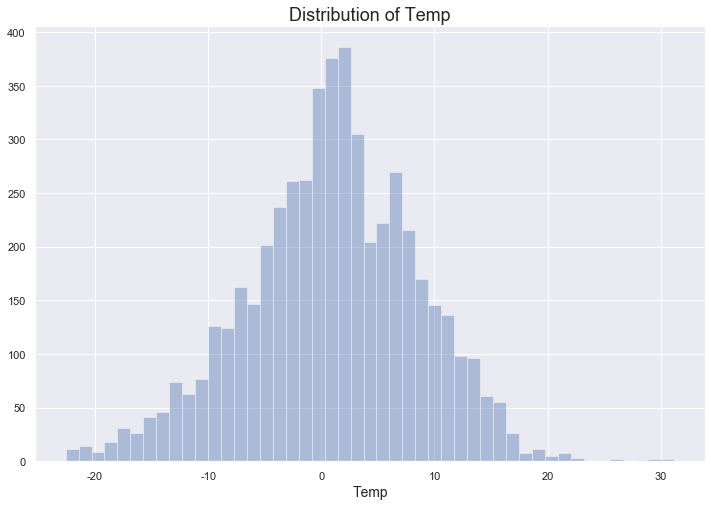

In [565]:
plt.figure(figsize = (12,8))
sns.distplot(df_heat.Temp.values, kde = False)
plt.xlabel('Temp', fontsize = 14)
plt.title('Distribution of Temp', fontsize = 18)
plt.show()

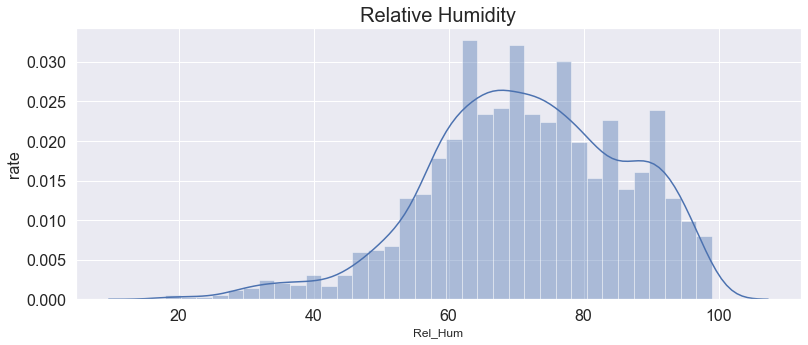

In [566]:
from matplotlib.font_manager import FontProperties   
myfont=FontProperties(size=14)
sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False      

x = df_heat['Rel_Hum']

plt.rcParams['figure.figsize'] = (13, 5)    
f = plt.figure()                            


sns.distplot(x)                           
plt.ylabel("rate", fontsize=16)
plt.xticks(fontsize=16)                  
plt.yticks(fontsize=16)
plt.title("Relative Humidity", fontsize=20)            
plt.savefig('wind_speed.jpg')
plt.show()

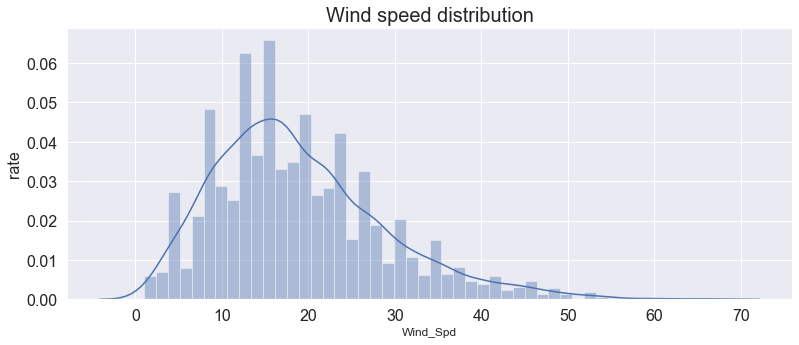

In [567]:
from matplotlib.font_manager import FontProperties   
myfont=FontProperties(size=14)
sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False      

x = df_heat['Wind_Spd']

plt.rcParams['figure.figsize'] = (13, 5)    
f = plt.figure()                            


sns.distplot(x)                           
plt.ylabel("rate", fontsize=16)
plt.xticks(fontsize=16)                  
plt.yticks(fontsize=16)
plt.title("Wind speed distribution", fontsize=20)            
plt.savefig('wind_speed.jpg')
plt.show()

In [568]:
df_heat.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp', 'Dew_Point_Temp',
       'Rel_Hum', 'Wind_Dir', 'Wind_Spd', 'Visibility', 'Stn_Press', 'Hmdx',
       'Wind_Chill', 'Weather', 'Hour'],
      dtype='object')

In [569]:
df_heat=df_heat[['Date/Time', 'Month', 'Day', 'Time', 'Temp', 'Dew_Point_Temp',
       'Rel_Hum', 'Wind_Dir', 'Wind_Spd', 'Visibility', 'Stn_Press', 'Hmdx',
       'Wind_Chill', 'Weather', 'Hour']]

In [570]:
# plt.figure(figsize=(20,20))
# g = sns.heatmap(
#     df_heat.corr(),
#     linewidth=1,annot=True
# )

# g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

In [571]:
df_heat.to_csv("/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/wea_data.csv", index = False)

In [572]:
##Importing the house data

In [573]:
agg_data = pd.read_csv("/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/agg_data.csv")

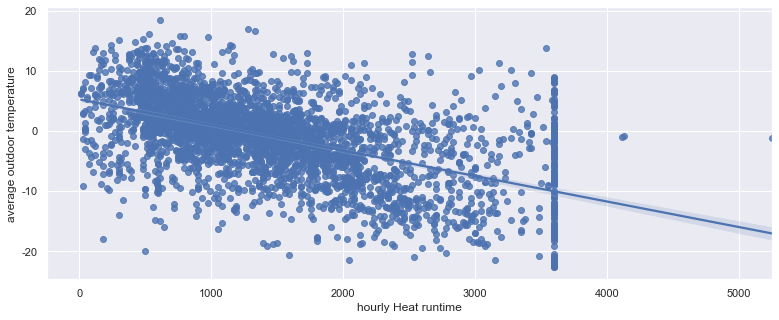

In [574]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)


sns.regplot(y="Temp", x="auxHeat1", data=df_merge)
plt.xlabel('hourly Heat runtime')
plt.ylabel('average outdoor temperature')
# plt.savefig('25.jpg')
plt.show()

In [575]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set(color_codes=True)


# sns.regplot(y="T_out", x="auxHeat1", data=agg_data)
# plt.xlabel('hourly Heat runtime')
# plt.ylabel('average T_out')
# plt.savefig('25.jpg')
# plt.show()

In [576]:
##Standardising the data

In [578]:
numerical_vars = ['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out','Humidity', 'fan']
sc = StandardScaler()
sc.fit(agg_data[numerical_vars])
scalar_data = sc.transform(agg_data[numerical_vars])

In [579]:
y_auxHeat1 = agg_data['auxHeat1'].to_numpy()
#oe = OrdinalEncoder()
#y_auxHeat = oe.fit_transform(y_auxHeat.reshape(-1, 1))
sc = StandardScaler()
sc.fit(y_auxHeat1.reshape(-1,1))
y_auxHeat1 = sc.transform(y_auxHeat1.reshape(-1,1))

In [580]:
scaler_agg_data = agg_data[numerical_vars].copy()
scaler_agg_data[numerical_vars] = scalar_data
scaler_agg_data["auxHeat1"] = y_auxHeat1

In [581]:
scaler_agg_data

,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,0.343517,0.298575,0.851287,1.867125,0.893055,-0.371311,-0.576214
1,0.343517,0.298575,0.894123,1.751500,0.893055,-0.897772,-0.454978
2,0.343517,0.298575,0.851287,1.635875,0.939806,-0.371311,0.133880
3,0.343517,0.298575,0.594272,1.404625,0.893055,-0.371311,-0.021994
4,0.343517,0.298575,0.294420,1.134834,0.904743,0.155149,0.255116
...,...,...,...,...,...,...,...
3437,0.343517,0.298575,0.123077,0.055667,0.694365,-0.521728,-1.078475
3438,0.343517,0.298575,0.123077,0.055667,0.343736,-0.371311,-0.732088
3439,0.343517,0.298575,-0.219610,0.364000,0.109983,-0.032872,-0.680130
3440,0.343517,0.298575,-0.133939,0.094209,0.074920,0.192753,-0.610852


In [582]:
df_heat.Month.unique()

array([ 2, 10, 11,  4,  3,  1, 12])

In [583]:
agg_data.Month.unique()

array([ 1,  2,  3,  4, 10, 11, 12])

In [584]:
df_merge  = pd.merge(left=agg_data, right=df_heat, left_on=['Month','Day','HourofDay'],right_on=['Month','Day','Hour'],how='left')

In [585]:
df_merge

,Month,Day,HourofDay,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,...,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind_Chill,Weather,Hour
0,1,1,0,70.0,70.0,41.5,95.5,37.000000,200.00,960.0,...,3.7,94.0,18.0,14.0,6.4,97.29,25.0,-11.0,"Drizzle,Fog",0
1,1,1,1,70.0,70.0,42.0,94.0,37.000000,182.50,1065.0,...,3.6,94.0,27.0,7.0,9.7,97.32,25.0,-11.0,"Drizzle,Fog",1
2,1,1,2,70.0,70.0,41.5,92.5,37.333333,200.00,1575.0,...,1.5,94.0,33.0,35.0,9.7,97.54,25.0,-11.0,"Rain,Drizzle,Fog",2
3,1,1,3,70.0,70.0,38.5,89.5,37.000000,200.00,1440.0,...,1.2,93.0,31.0,29.0,19.3,97.89,25.0,-11.0,"Rain,Drizzle,Fog",3
4,1,1,4,70.0,70.0,35.0,86.0,37.083333,217.50,1680.0,...,0.8,92.0,31.0,30.0,24.1,98.16,25.0,-11.0,Cloudy,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,12,31,17,70.0,70.0,33.0,72.0,35.583333,195.00,525.0,...,-3.7,81.0,24.0,22.0,24.1,97.88,26.0,-7.0,Snow,17
3438,12,31,18,70.0,70.0,33.0,72.0,33.083333,200.00,825.0,...,-3.7,80.0,23.0,18.0,24.1,97.93,26.0,-6.0,Snow,18
3439,12,31,21,70.0,70.0,29.0,76.0,31.416667,211.25,870.0,...,-4.5,78.0,25.0,25.0,24.1,98.01,26.0,-7.0,Mostly Cloudy,21
3440,12,31,22,70.0,70.0,30.0,72.5,31.166667,218.75,930.0,...,-4.5,80.0,24.0,19.0,24.1,98.05,26.0,-7.0,Clear,22


In [586]:
df_merge.to_csv("/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/merge_data.csv", index = False)

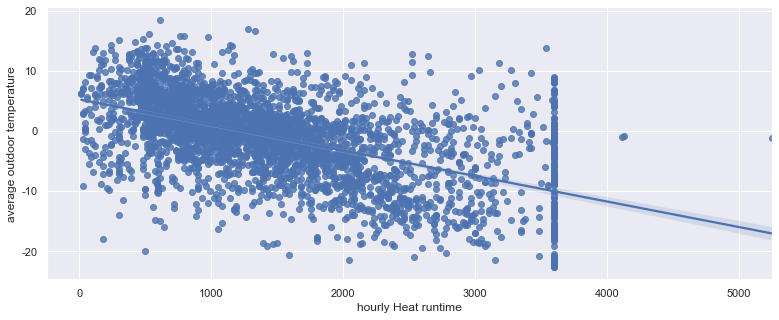

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)


sns.regplot(y="Temp", x="auxHeat1", data=df_merge)
plt.xlabel('hourly Heat runtime')
plt.ylabel('average outdoor temperature')
# plt.savefig('25.jpg')
plt.show()

In [459]:
##Standardising the data

In [529]:
df_merge.columns

Index(['Month', 'Day', 'HourofDay', 'T_ctrl', 'T_stp_heat', 'T_out', 'RH_out',
       'Humidity', 'fan', 'auxHeat1', 'Longitude (x)', 'Latitude (y)',
       'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Time', 'Temp',
       'Dew_Point_Temp', 'Rel_Hum', 'Wind_Dir', 'Wind_Spd', 'Visibility',
       'Stn_Press', 'Hmdx', 'Wind_Chill', 'Weather', 'Hour'],
      dtype='object')

In [531]:
numerical_vars = ['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out','Humidity', 'fan','Temp','Dew_Point_Temp','Rel_Hum','Wind_Dir','Wind_Spd','Visibility','Stn_Press','Hmdx','Wind_Chill']
sc = StandardScaler()
sc.fit(df_merge[numerical_vars])
scalar_data = sc.transform(df_merge[numerical_vars])

In [532]:
y_auxHeat1 = df_merge['auxHeat1'].to_numpy()
#oe = OrdinalEncoder()
#y_auxHeat = oe.fit_transform(y_auxHeat.reshape(-1, 1))
sc = StandardScaler()
sc.fit(y_auxHeat1.reshape(-1,1))
y_auxHeat1 = sc.transform(y_auxHeat1.reshape(-1,1))

In [533]:
scaler_agg_data = df_merge[numerical_vars].copy()
scaler_agg_data[numerical_vars] = scalar_data
scaler_agg_data["auxHeat1"] = y_auxHeat1

In [534]:
scaler_agg_data

,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind_Chill,auxHeat1
0,0.343517,0.298575,0.851287,1.867125,0.893055,-0.371311,0.797308,1.240491,1.646022,-0.138923,-0.498745,-2.246812,-2.550268,-1.871978,-0.345126,-0.576214
1,0.343517,0.298575,0.894123,1.751500,0.893055,-0.897772,0.782639,1.227121,1.646022,0.732772,-1.196259,-1.733060,-2.517687,-1.871978,-0.345126,-0.454978
2,0.343517,0.298575,0.851287,1.635875,0.939806,-0.371311,0.489277,0.946344,1.646022,1.313903,1.593797,-1.733060,-2.278760,-1.871978,-0.345126,0.133880
3,0.343517,0.298575,0.594272,1.404625,0.893055,-0.371311,0.459941,0.906233,1.571308,1.120193,0.995927,-0.238508,-1.898648,-1.871978,-0.345126,-0.021994
4,0.343517,0.298575,0.294420,1.134834,0.904743,0.155149,0.415936,0.852752,1.496593,1.120193,1.095572,0.508768,-1.605418,-1.871978,-0.345126,0.255116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,0.343517,0.298575,0.123077,0.055667,0.694365,-0.521728,0.019897,0.251088,0.674732,0.442207,0.298413,0.508768,-1.909508,-0.586137,0.303747,-1.078475
3438,0.343517,0.298575,0.123077,0.055667,0.343736,-0.371311,0.034565,0.251088,0.600018,0.345352,-0.100166,0.508768,-1.855206,-0.586137,0.465965,-0.732088
3439,0.343517,0.298575,-0.219610,0.364000,0.109983,-0.032872,-0.024107,0.144125,0.450589,0.539062,0.597348,0.508768,-1.768324,-0.586137,0.303747,-0.680130
3440,0.343517,0.298575,-0.133939,0.094209,0.074920,0.192753,-0.082780,0.144125,0.600018,0.442207,-0.000521,0.508768,-1.724882,-0.586137,0.303747,-0.610852


[Text(0, 0.5, 'T_ctrl'),
 Text(0, 1.5, 'T_stp_heat'),
 Text(0, 2.5, 'T_out'),
 Text(0, 3.5, 'RH_out'),
 Text(0, 4.5, 'Humidity'),
 Text(0, 5.5, 'fan'),
 Text(0, 6.5, 'Temp'),
 Text(0, 7.5, 'Dew_Point_Temp'),
 Text(0, 8.5, 'Rel_Hum'),
 Text(0, 9.5, 'Wind_Dir'),
 Text(0, 10.5, 'Wind_Spd'),
 Text(0, 11.5, 'Visibility'),
 Text(0, 12.5, 'Stn_Press'),
 Text(0, 13.5, 'Hmdx'),
 Text(0, 14.5, 'Wind_Chill'),
 Text(0, 15.5, 'auxHeat1')]

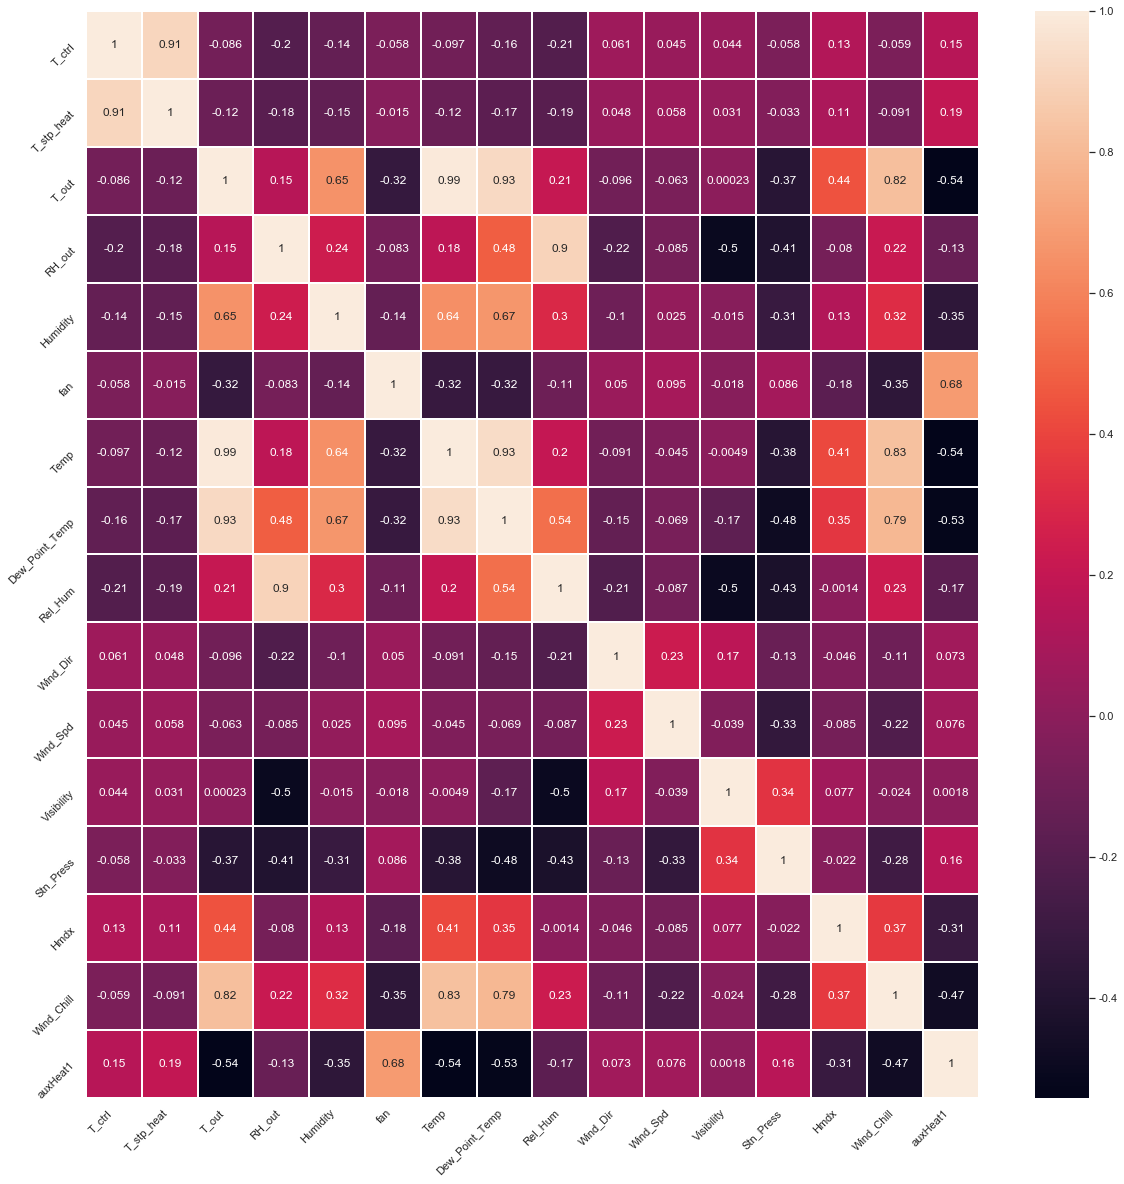

In [535]:
plt.figure(figsize=(20,20))
g = sns.heatmap(
    scaler_agg_data.corr(),
    linewidth=1,annot=True
)

g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')